In [1]:
import pyEX as p
import pandas as pd
import seaborn as sns
import talib as t #talib provides all kinds of tools for technical indicators
c = p.Client(api_token='pk_6353e33d5d1244c5b48150a9e1e93239')
sym='IEX'
col='close'
period=14 #RSI typically takes the first 14 days to generate an average change score 
df = c.chartDF(symbol=sym, timeframe='1y')  #need a lot of data for a good plot 
df.reset_index(inplace=True)
df.sort_values(by=['date'],inplace=True)
df['rsi']= t.RSI(df[col].values.astype(float), period) #ta-lib offers functions for calculating indicators


In [15]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork',context='talk',fscale=1.6)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


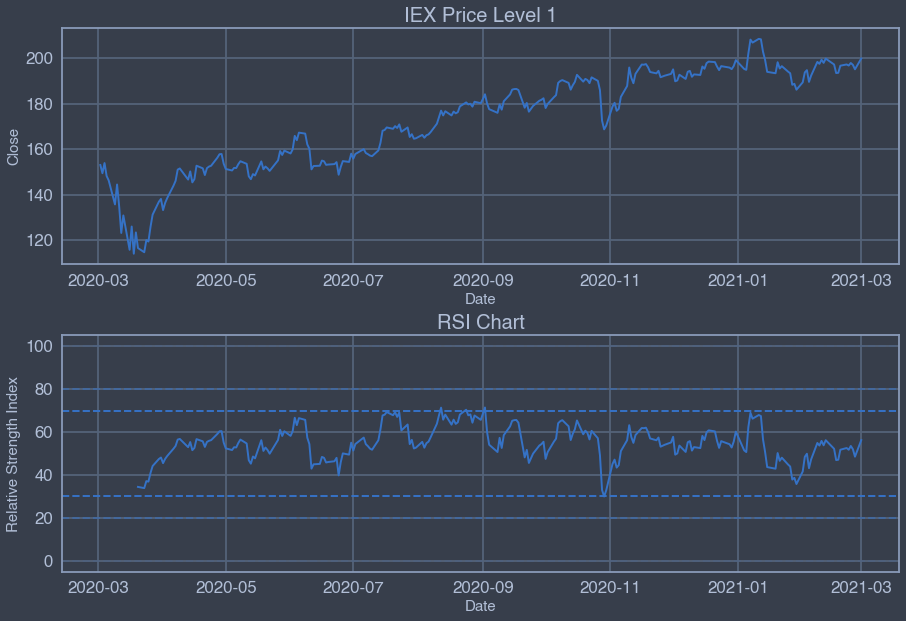

In [16]:
#plot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=1, wspace=.2, hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.lineplot(x='date',y='close',data=df,ax=ax0)
ax.set_title('IEX Price Level 1',fontsize=20)
plt.ylabel("Close", fontsize=15)
plt.xlabel("Date", fontsize=15)
ax1=fig.add_subplot(gs[1,0],sharex=ax0)
ax=sns.lineplot(x='date',y='rsi',data=df,ax=ax1)
ax.set_title('RSI Chart',fontsize=20)
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.ylabel("Relative Strength Index", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.savefig('/Users/Alexis/Documents/Courses/Winter2021/Stat359/359/L1_RSI.png', bbox_inches='tight')

In [57]:
#try level 2 
L2=pd.read_csv('/Users/Alexis/Documents/Courses/Winter2021/Stat359/359/processedlevel2data.csv')
#drop na
L2.dropna(subset=['bidtimestamp', 'asktimestamp'],thresh=1,inplace=True)
L2.sort_values(by=['bidtimestamp','asktimestamp'],inplace=True)
L2['bid_rsi']= t.RSI(L2['bidprice'].values.astype(float), period)
L2['ask_rsi']= t.RSI(L2['askprice'].values.astype(float), period)
bid=L2[['bidprice','bidtimestamp','bid_rsi','bidsize']]
ask=L2[['askprice','asktimestamp','ask_rsi','asksize']]
ask.dropna(inplace=True)
bid.dropna(inplace=True)
ask.sort_values(by=['asktimestamp'],inplace=True)
bid.sort_values(by=['bidtimestamp'],inplace=True)
bid['bidtimestamp']=pd.to_datetime(bid['bidtimestamp'])
ask['asktimestamp']=pd.to_datetime(ask['asktimestamp'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


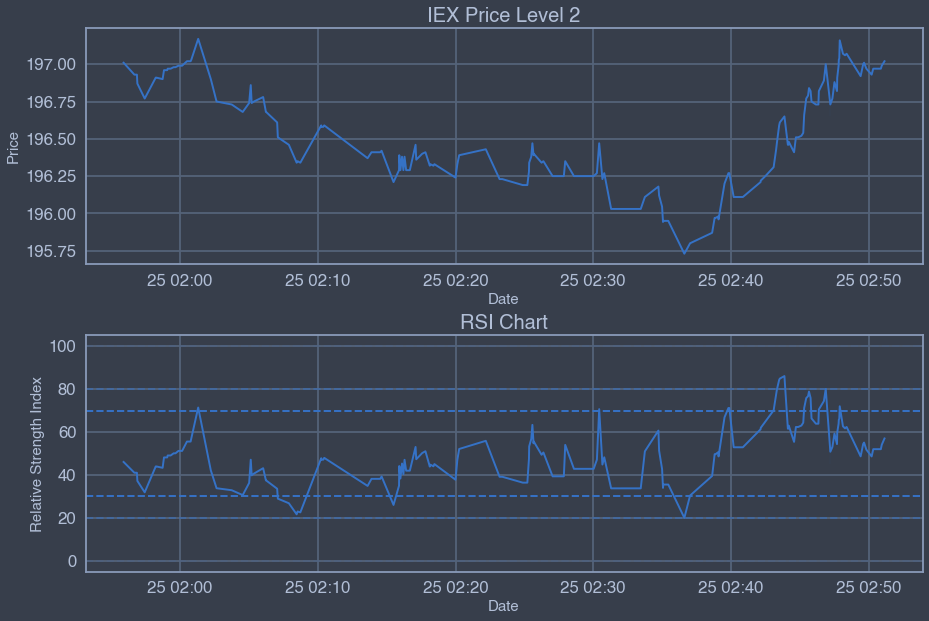

In [25]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
               Line2D([0], [0], color='red', lw=4)]
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=1, wspace=.2, hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.lineplot(x='bidtimestamp',y='bidprice',data=bid,ax=ax0,color='b')
#g=sns.lineplot(x='asktimestamp',y='askprice',data=ask,ax=ax0,color='r')
ax.set_title('IEX Price Level 2',fontsize=20)
plt.ylabel("Price", fontsize=15)
plt.xlabel("Date", fontsize=15)
#ax.legend(custom_lines, ['Bid','Ask'],loc='lower left',fontsize='large')
ax1=fig.add_subplot(gs[1,0],sharex=ax0)
ax=sns.lineplot(x='bidtimestamp',y='bid_rsi',data=bid,ax=ax1,color='b')
#sns.lineplot(x='asktimestamp',y='ask_rsi',ci=None,data=ask,ax=ax1,color='r')
ax.set_title('RSI Chart',fontsize=20)
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.ylabel("Relative Strength Index", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
#ax.legend(custom_lines, ['Bid','Ask'],loc='lower left',fontsize='large')

plt.savefig('/Users/Alexis/Documents/Courses/Winter2021/Stat359/359/L2_RSI.png', bbox_inches='tight')

In [53]:
bid['type']=0
ask['type']=1
bid.rename(columns={'bidprice':'price','bidtimestamp':'time','bid_rsi':'rsi','bidsize':'size'},inplace=True)
ask.rename(columns={'askprice':'price','asktimestamp':'time','ask_rsi':'rsi','asksize':'size'},inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [54]:
final=pd.concat([bid,ask])

In [55]:
data = final.drop_duplicates(subset='time', keep='first')
data.to_csv("~/.qlib/csv_data/L2.csv")

In [56]:
data

,price,time,rsi,size,type
60,197.01,2021-02-25 01:55:54,46.078431,100.0,0
62,196.93,2021-02-25 01:56:41,41.055376,100.0,0
64,196.93,2021-02-25 01:56:52,41.055376,100.0,0
65,196.87,2021-02-25 01:56:54,37.251476,100.0,0
73,196.77,2021-02-25 01:57:26,31.939873,100.0,0
...,...,...,...,...,...
594,197.27,2021-02-25 02:49:22,71.525391,100.0,1
599,197.19,2021-02-25 02:49:58,62.282687,100.0,1
605,197.25,2021-02-25 02:50:34,64.363048,100.0,1
607,197.27,2021-02-25 02:50:47,55.503885,100.0,1
